**Fish Biomass Estimator**



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from joblib import Parallel, delayed
import joblib
import math


 **Loading the dataset**

In [3]:
dataset=pandas.read_csv("gdrive/MyDrive/2022-Fish Biomass/Dataset/Final Dataset/dataset_final.csv")

In [4]:
dataset

,Unnamed: 0.1,Unnamed: 0,_xtl,_ytl,_xbr,_ybr,depth,length_cm,width_cm,biomass_mg,label,length_pix,width_pix,turbidity
0,0,0,1219.96,690.74,1920.00,1023.50,46.661239,20.0,10.6,126.0,NaN,700.04,332.76,10.686298
1,1,1,1218.87,690.74,1918.92,1023.50,46.596766,20.0,10.6,126.0,NaN,700.05,332.76,14.917709
2,2,2,1217.79,690.74,1917.83,1023.50,45.134771,20.0,10.6,126.0,NaN,700.04,332.76,10.709706
3,3,3,1216.71,690.74,1916.75,1023.50,46.344511,20.0,10.6,126.0,NaN,700.04,332.76,12.740902
4,4,4,1215.62,690.74,1915.67,1023.50,45.370098,20.0,10.6,126.0,NaN,700.05,332.76,10.202941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11281,11281,11281,542.64,322.79,1017.86,488.69,29.915848,14.1,7.8,47.0,29.0,475.22,165.90,12.812684
11282,11282,11282,567.13,410.74,940.00,571.02,30.707346,9.7,5.9,17.0,30.0,372.87,160.28,11.856356
11283,11283,11283,537.08,377.35,921.10,541.00,30.288012,9.7,5.8,17.0,30.0,384.02,163.65,10.506233
11284,11284,11284,519.27,398.50,903.30,565.50,30.677551,9.7,6.1,17.0,30.0,384.03,167.00,10.739388


**Spliting the dataset into Training and testing**

In [5]:
X = dataset[['length_cm','width_cm','turbidity']]
y = dataset['biomass_mg']

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=1)


In [ ]:
X_train

,length_cm,width_cm,turbidity
3289,20.0,10.6,14.139822
8324,8.0,4.5,13.971896
2619,20.0,10.6,12.282169
6686,13.5,6.9,13.418208
6955,13.5,6.9,11.874490
...,...,...,...
7813,8.0,4.5,11.352186
10955,8.0,4.5,11.357036
905,20.0,10.6,11.566443
5192,13.5,6.9,12.469490


In [ ]:
y_train

3289     126.0
8324      10.0
2619     126.0
6686      42.0
6955      42.0
         ...  
7813      10.0
10955     10.0
905      126.0
5192      42.0
235      126.0
Name: biomass_mg, Length: 10157, dtype: float64

**Applying Grid Search to find out the model suitable for our dataset**


In [ ]:
regressors = [
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [ ]:
head = 9
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print("\tMAE/R2_score:",mean_absolute_error(y_test, y_pred)/r2_score(y_test, y_pred))
    print()

GradientBoostingRegressor()
	Training time: 1.269s
	Prediction time: 0.009s
	Explained variance: 0.9999994215872667
	Mean absolute error: 0.0052404832530713
	R2 score: 0.9999994193869416
	MAE/R2_score: 0.005240486295766076

KNeighborsRegressor()
	Training time: 0.006s
	Prediction time: 0.009s
	Explained variance: 0.9999628635756255
	Mean absolute error: 0.02366696191319751
	R2 score: 0.9999627443625417
	MAE/R2_score: 0.023667843673800842

ExtraTreesRegressor()
	Training time: 0.306s
	Prediction time: 0.024s
	Explained variance: 0.9999993895067301
	Mean absolute error: 0.0024623560673162257
	R2 score: 0.9999993889105558
	MAE/R2_score: 0.0024623575720369457

RandomForestRegressor()
	Training time: 0.869s
	Prediction time: 0.020s
	Explained variance: 0.999997718484951
	Mean absolute error: 0.0059902568644818535
	R2 score: 0.9999977106827769
	MAE/R2_score: 0.0059902705781114595

DecisionTreeRegressor()
	Training time: 0.011s
	Prediction time: 0.002s
	Explained variance: 0.999999866667959
	

In [ ]:
e=ExtraTreesRegressor()

In [ ]:
e.fit(X_train,y_train)

ExtraTreesRegressor()

In [ ]:
joblib.dump(model, '/content/gdrive/MyDrive/2022-Fish Biomass/CODE/biomass.pkl')
y_pred=e.predict(X_test)
y_pred


NameError: ignored

In [ ]:
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))

	Mean absolute error: 0.0031319751992914223
	R2 score: 0.9999992327814702


20.0


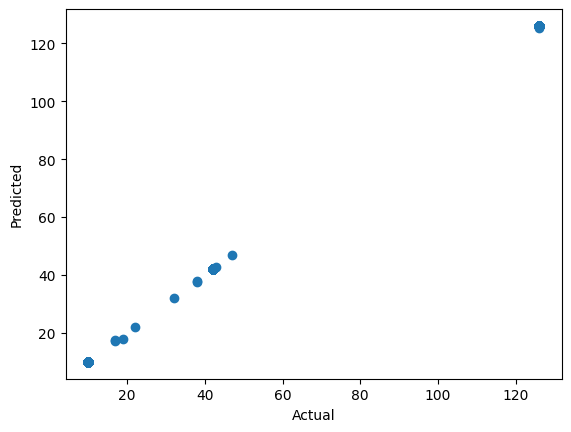

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [7]:
biomass_estimator= joblib.load('/content/gdrive/MyDrive/2022-Fish Biomass/CODE/biomass.pkl')
biomass_res=biomass_estimator.predict(X_test)
print(X_test,biomass_res)

       length_cm  width_cm  turbidity
9722         8.0       4.5  13.896098
2932        20.0      10.6  13.482141
4980        13.5       6.9  11.126047
1587        20.0      10.6  13.922834
8945         8.0       4.5  12.417260
...          ...       ...        ...
8197         8.0       4.5  14.410802
8231         8.0       4.5  12.809865
10190        8.0       4.5  13.447594
4701        13.5       6.9  13.761352
3706        20.0      10.6  11.300378

[1129 rows x 3 columns] [  8.42824255 125.19858515  43.996533   ...   8.43266534  43.97054575
 125.22009993]


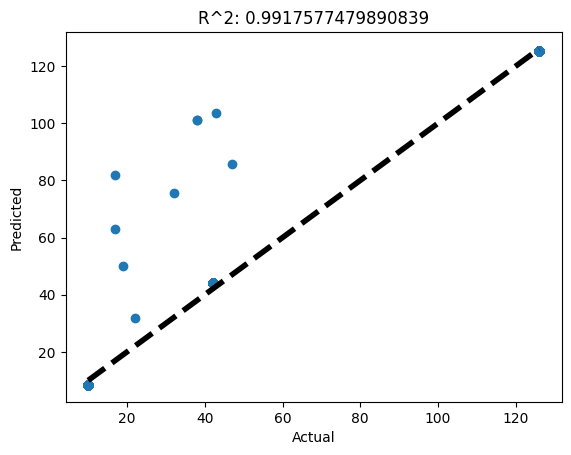

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, biomass_res)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line

#ax.plot(y_test, depth_result)
ax.set_title('R^2: ' + str(r2_score(y_test, biomass_res)))
plt.show()

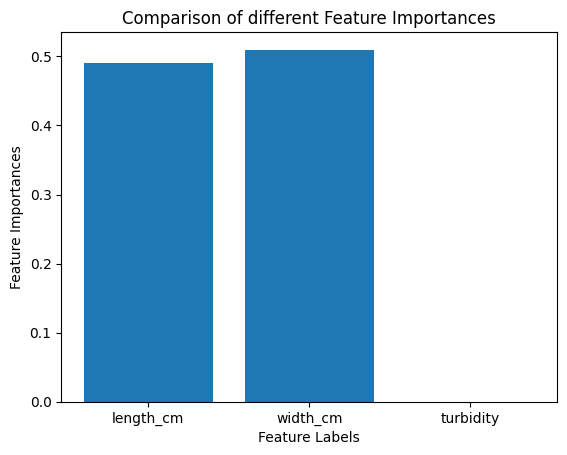

In [ ]:
# Computing the importance of each feature
#Feature Importance
feature_importance = e.feature_importances_
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [ ]:
mapping_table={5:7.0,10:6.7,15:6.3,20:6.0,30:5.7,40:5.3,50:5.0,60:4.8,70:4.6,80:4.4,90:4.2,100:4}
def calc_feed(count,total_weight):
  avg_weight=total_weight/count
  aw = round(avg_weight/10)*10

  
  return count*avg_weight*mapping_table[aw]/100


Performance

In [10]:
ar=[]
for i in range(len(dataset)):
  ar.append(dataset['length_cm'][i]*dataset['width_cm'][i])


dataset['area']=ar
print(len(dataset))

11286


WHOLE POWER

In [22]:
W1=[]
W2=[]
W3=[]
W4=[]
W5=[]
W6=[]
W7=[]
for i in range(len(dataset)):
  W1.append(math.pow(1.70*dataset['area'][i],3/2))
  W2.append(math.pow((0.124*dataset['area'][i]),1.55))
  W3.append(75.505*math.exp(0.008*dataset['area'][i]))
  W4.append(2.6609*dataset['area'][i]-141.14)
  W5.append(448.84*math.log(dataset['area'][i])-1984.1)
  W6.append(math.pow(0.0048*dataset['area'][i],2)+0.9309*dataset['area'][i]+7.8245)
  W7.append(math.pow(0.2501*dataset['area'][i],1.3831))


dataset['W1']=W1
dataset['W2']=W2
dataset['W3']=W3
dataset['W4']=W4
dataset['W5']=W5
dataset['W6']=W6
dataset['W7']=W7

print(dataset)


       Unnamed: 0.1  Unnamed: 0     _xtl    _ytl     _xbr     _ybr      depth  \
0                 0           0  1219.96  690.74  1920.00  1023.50  46.661239   
1                 1           1  1218.87  690.74  1918.92  1023.50  46.596766   
2                 2           2  1217.79  690.74  1917.83  1023.50  45.134771   
3                 3           3  1216.71  690.74  1916.75  1023.50  46.344511   
4                 4           4  1215.62  690.74  1915.67  1023.50  45.370098   
...             ...         ...      ...     ...      ...      ...        ...   
11281         11281       11281   542.64  322.79  1017.86   488.69  29.915848   
11282         11282       11282   567.13  410.74   940.00   571.02  30.707346   
11283         11283       11283   537.08  377.35   921.10   541.00  30.288012   
11284         11284       11284   519.27  398.50   903.30   565.50  30.677551   
11285         11285       11285   488.10  395.16   901.04   591.05  29.021138   

       length_cm  width_cm 

In [23]:
print("R^2\n")
print("W1:",r2_score(dataset['biomass_mg'],dataset['W1']))
print("W2:",r2_score(dataset['biomass_mg'],dataset['W2']))
print("W3:",r2_score(dataset['biomass_mg'],dataset['W3']))
print("W4:",r2_score(dataset['biomass_mg'],dataset['W4']))
print("W5:",r2_score(dataset['biomass_mg'],dataset['W5']))
print("W6:",r2_score(dataset['biomass_mg'],dataset['W6']))
print("W7:",r2_score(dataset['biomass_mg'],dataset['W7']))
print("Proposed Method",r2_score(y_test,biomass_res))

R^2

W1: -7539.495143790653
W2: 0.8308663267233117
W3: -14.33274240455247
W4: -13.691197508670637
W5: -30.077247959166726
W6: -0.4413570305721892
W7: -1.2998890741538944
Proposed Method 0.9917577479890839


In [24]:
print("MAE\n")
print("W1:",mean_absolute_error(dataset['biomass_mg'],dataset['W1']))
print("W2:",mean_absolute_error(dataset['biomass_mg'],dataset['W2']))
print("W3:",mean_absolute_error(dataset['biomass_mg'],dataset['W3']))
print("W4:",mean_absolute_error(dataset['biomass_mg'],dataset['W4']))
print("W5:",mean_absolute_error(dataset['biomass_mg'],dataset['W5']))
print("W6:",mean_absolute_error(dataset['biomass_mg'],dataset['W6']))
print("W7:",mean_absolute_error(dataset['biomass_mg'],dataset['W7']))
print("Proposed Method",mean_absolute_error(y_test, biomass_res))

MAE

W1: 3435.194786593441
W2: 14.070235954378473
W3: 177.5439300248347
W4: 156.11427394974305
W5: 239.6196058425737
W6: 57.44654981148241
W7: 61.13447500585647
Proposed Method 1.6946774984115331


NOT WHOLE POWER


In [25]:
W1_=[]
W2_=[]
W3_=[]
W4_=[]
W5_=[]
W6_=[]
W7_=[]
for i in range(len(dataset)):
  W1_.append(1.70*math.pow((dataset['area'][i]),3/2))
  W2_.append(0.124*math.pow((dataset['area'][i]),1.55))
  W3_.append(75.505*math.exp(0.008*dataset['area'][i]))
  W4_.append((2.6609*dataset['area'][i])-141.14)
  W5_.append((448.84*math.log(dataset['area'][i]))-1984.1)
  W6_.append(0.0048*math.pow(dataset['area'][i],2)+0.9309*dataset['area'][i]+7.8245)
  W7_.append(0.2501*math.pow(dataset['area'][i],1.3831))


dataset['W1_']=W1_
dataset['W2_']=W2_
dataset['W3_']=W3_
dataset['W4_']=W4_
dataset['W5_']=W5_
dataset['W6_']=W6_
dataset['W7_']=W7_

print(dataset)

       Unnamed: 0.1  Unnamed: 0     _xtl    _ytl     _xbr     _ybr      depth  \
0                 0           0  1219.96  690.74  1920.00  1023.50  46.661239   
1                 1           1  1218.87  690.74  1918.92  1023.50  46.596766   
2                 2           2  1217.79  690.74  1917.83  1023.50  45.134771   
3                 3           3  1216.71  690.74  1916.75  1023.50  46.344511   
4                 4           4  1215.62  690.74  1915.67  1023.50  45.370098   
...             ...         ...      ...     ...      ...      ...        ...   
11281         11281       11281   542.64  322.79  1017.86   488.69  29.915848   
11282         11282       11282   567.13  410.74   940.00   571.02  30.707346   
11283         11283       11283   537.08  377.35   921.10   541.00  30.288012   
11284         11284       11284   519.27  398.50   903.30   565.50  30.677551   
11285         11285       11285   488.10  395.16   901.04   591.05  29.021138   

       length_cm  width_cm 

In [26]:
print("R^2\n")
print("W1:",r2_score(dataset['biomass_mg'],dataset['W1_']))
print("W2:",r2_score(dataset['biomass_mg'],dataset['W2_']))
print("W3:",r2_score(dataset['biomass_mg'],dataset['W3_']))
print("W4:",r2_score(dataset['biomass_mg'],dataset['W4_']))
print("W5:",r2_score(dataset['biomass_mg'],dataset['W5_']))
print("W6:",r2_score(dataset['biomass_mg'],dataset['W6_']))
print("W7:",r2_score(dataset['biomass_mg'],dataset['W7_']))
print("Proposed Method",r2_score(y_test,biomass_res))

R^2

W1: -4383.726230835322
W2: -22.151105046033294
W3: -14.33274240455247
W4: -13.691197508670637
W5: -30.077247959166726
W6: -13.831218222676883
W7: -12.915645153613323
Proposed Method 0.9917577479890839


In [27]:
print("MAE\n")
print("W1:",mean_absolute_error(dataset['biomass_mg'],dataset['W1_']))
print("W2:",mean_absolute_error(dataset['biomass_mg'],dataset['W2_']))
print("W3:",mean_absolute_error(dataset['biomass_mg'],dataset['W3_']))
print("W4:",mean_absolute_error(dataset['biomass_mg'],dataset['W4_']))
print("W5:",mean_absolute_error(dataset['biomass_mg'],dataset['W5_']))
print("W6:",mean_absolute_error(dataset['biomass_mg'],dataset['W6_']))
print("W7:",mean_absolute_error(dataset['biomass_mg'],dataset['W7_']))
print("Proposed Method",mean_absolute_error(y_test, biomass_res))

MAE

W1: 2619.2150333094514
W2: 187.1041670339744
W3: 177.5439300248347
W4: 156.11427394974305
W5: 239.6196058425737
W6: 158.51713646613675
W7: 150.43200677785245
Proposed Method 1.6946774984115331
